# Preparing The Data

Dataset -
http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

**Text Classification using Multinomial Naive Bayes**:-

**Description of the Dataset:**

The dataset for this project consists of a collection of text documents labeled into different categories/classes. Each document is associated with a specific category or label. The texts can vary from articles, reviews, emails, news, or any other form of textual data. The dataset contains the following attributes:

Text Data: The textual content of the documents.
Labels or Categories: The classification labels or categories that each document belongs to.
The dataset is pre-processed and organized into a suitable format for text classification tasks. It might have undergone processes like tokenization, stemming, stop-word removal, and possibly vectorization (transformed into numerical form) for machine learning purposes.

**Tasks:**

**Perform Text Classification using Multinomial Naive Bayes (Sklearn):** Utilize the Multinomial Naive Bayes algorithm available in the sklearn library for text classification. Train the model on a portion of the dataset, perform predictions on the test set, and evaluate its performance metrics.

**Implement Naive Bayes from Scratch for Text Classification:** Develop your own implementation of the Naive Bayes algorithm specifically tailored for text classification. This involves calculating probabilities, handling text data, and building the necessary components of the algorithm such as the vocabulary, likelihoods, and priors.

**Compare Results:** Evaluate and compare the performance of your self-implemented Naive Bayes algorithm with the Multinomial Naive Bayes implementation from sklearn. Compare metrics such as accuracy, precision, recall, and F1-score to assess the performance differences and similarities between the two implementations.

In [6]:
import urllib.request
import tarfile
import os
import pandas as pd

# I am using Anaconda and  i have uploaded 20_newsgroups.tar.gz and extracting it directly on cloud

# Step 2: Extract the contents of the archive


with tarfile.open('20_newsgroups.tar.gz', 'r:gz') as tar: # Note insert the location where 20_newsgroups.tar.gz is present  
    tar.extractall()

# Step 3: Load the data into a DataFrame
data = {'text': [], 'label': []}
data_dir = '20_newsgroups/'

# Loop through subdirectories
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        for document_name in os.listdir(category_path):
            document_path = os.path.join(category_path, document_name)
            if os.path.isfile(document_path):
                with open(document_path, 'r', encoding='latin-1') as file:
                    text = file.read()
                data['text'].append(text)
                data['label'].append(category)

# Create a DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the DataFrame to check
print(df.head())


                                                text           label
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  comp.windows.x
1  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  comp.windows.x
2  Xref: cantaloupe.srv.cs.cmu.edu comp.sys.sun.a...  comp.windows.x
3  Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...  comp.windows.x
4  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.windows.x


In [22]:
df.shape

(19997, 2)

# Preprocessing The Text Data

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a string
    preprocessed_text = ' '.join(filtered_words)

    return preprocessed_text

# Apply preprocessing to the 'text' column in the DataFrame
df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /home/d5080aa3-220e-4b79-8e9f-
[nltk_data]     d516de6eee66/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/d5080aa3-220e-4b79-8e9f-
[nltk_data]     d516de6eee66/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
df["text"].head()

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    path cantaloupesrvcscmuedudasnewsharvardedunoc...
2    xref cantaloupesrvcscmuedu compsyssunadmin com...
3    xref cantaloupesrvcscmuedu compwindowsxapps co...
4    path cantaloupesrvcscmueducrabapplesrvcscmuedu...
Name: text, dtype: object

# Splitting the data 

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


**Applying The Naive Bayes from Sklearn**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.79      0.87      0.83       206
           comp.graphics       0.95      0.86      0.90       227
 comp.os.ms-windows.misc       0.91      0.91      0.91       196
comp.sys.ibm.pc.hardware       0.78      0.89      0.83       200
   comp.sys.mac.hardware       0.95      0.96      0.96       218
          comp.windows.x       0.93      0.94      0.93       173
            misc.forsale       0.95      0.78      0.86       226
               rec.autos       0.96      0.94      0.95       205
         rec.motorcycles       0.99      0.98      0.99       204
      rec.sport.baseball       0.97      0.99      0.98       186
        rec.sport.hockey       0.98      0.97      0.98       192
               sci.crypt       0.94      0.99      0.96       190
         sci.electronics       0.93      0.96      0.95       179
                 sci.med       0.98      0.94      0.96       215
         

# Visualising the Confusion Matrix with heatmap

Matplotlib is building the font cache; this may take a moment.


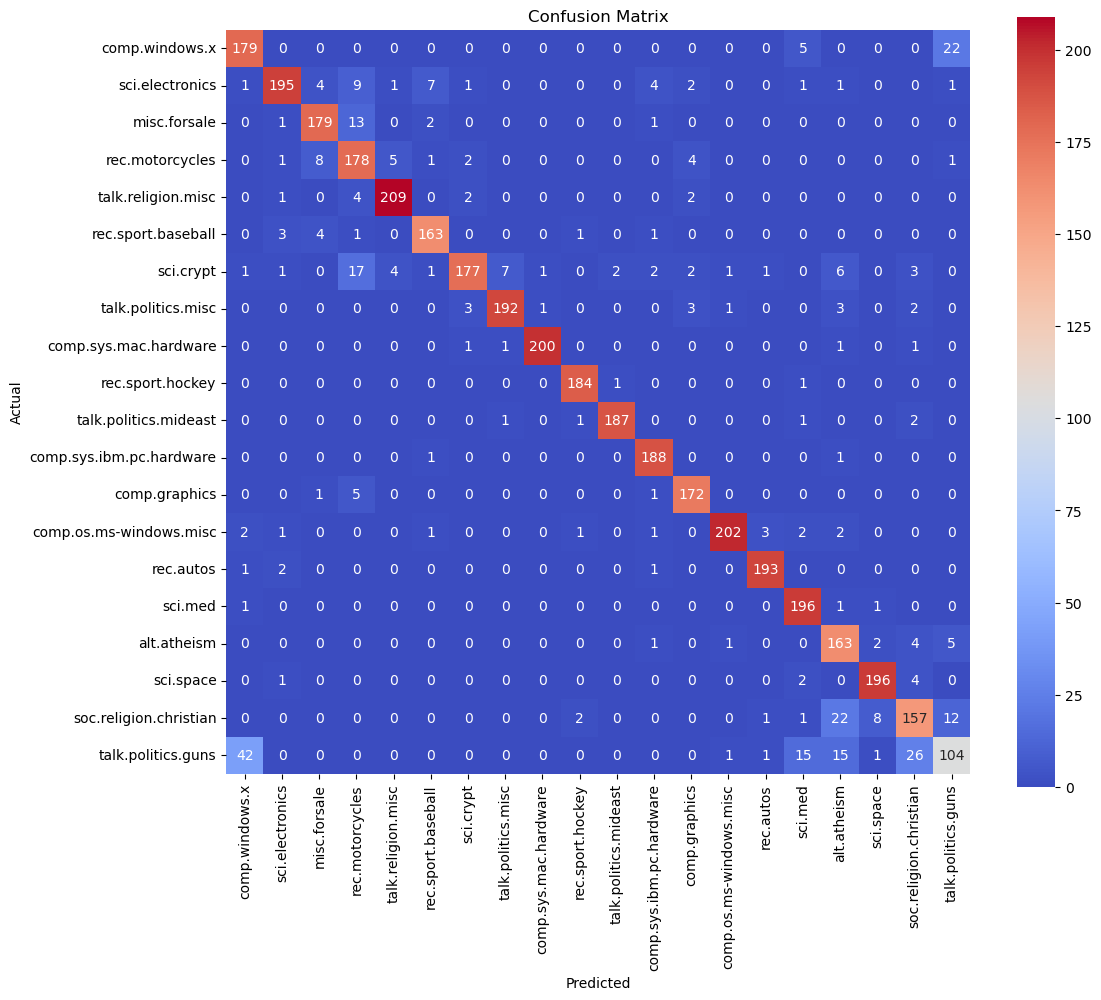

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=df['label'].unique(), columns=df['label'].unique())

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='coolwarm', cbar=True, square=True)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


# Results from sklearn Naive Bayes Model
cells in daigonal elements indiactes that our model is performing really well with category and cell with light color indicates model is misclassifying the category
here are some insights:-

1)talk.relegion.msc for this category model is performing really well with 209 correct classification and 6 true negatives.

2)talk.politics.guns for this category model is performing the poorest with 104 true positives and 99 true negatives

3)overall model is performing well for all class except  talk.politics.guns

# Making Naive Bayes Model from scratch

In [53]:
from math import log


class_priors = {}
total_samples = len(y_train)

for label in df['label'].unique():
    class_samples = (y_train == label).sum()
    class_priors[label] = class_samples / total_samples

    
class_word_counts = {}

for label in df['label'].unique():
    # Filter the training data for the current class
    class_data = X_train[y_train == label]

    # Tokenize and count words for the current class
    words = ' '.join(class_data).split()
    word_counts = {}
    total_words = len(words)

    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    class_word_counts[label] = word_counts

    
def predict(text):
    best_label = None
    best_score = float('-inf')

    for label in df['label'].unique():
        score = 0
        for word in text.split():
            if word in class_word_counts[label]:
                # Use Laplace smoothing to avoid zero probabilities
                word_count = class_word_counts[label][word] + 1
            else:
                word_count = 1

            # Calculate the log likelihood
            score += log(word_count / (len(class_word_counts[label]) + total_words))

        # Add the prior probability (log)
        score += log(class_priors[label])

        if score > best_score:
            best_score = score
            best_label = label

    return best_label

# Make predictions on the test data
predictions = [predict(text) for text in X_test]


from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


                          precision    recall  f1-score   support

             alt.atheism       0.82      0.77      0.79       206
           comp.graphics       0.84      0.90      0.87       227
 comp.os.ms-windows.misc       0.99      0.70      0.82       196
comp.sys.ibm.pc.hardware       0.78      0.87      0.82       200
   comp.sys.mac.hardware       0.96      0.93      0.94       218
          comp.windows.x       0.85      0.96      0.90       173
            misc.forsale       0.96      0.66      0.78       226
               rec.autos       0.92      0.89      0.91       205
         rec.motorcycles       0.99      0.91      0.95       204
      rec.sport.baseball       0.98      0.95      0.96       186
        rec.sport.hockey       0.98      0.96      0.97       192
               sci.crypt       0.89      0.98      0.93       190
         sci.electronics       0.91      0.90      0.90       179
                 sci.med       0.98      0.92      0.95       215
         

# Visualising the Confusion Matrix From Basic model

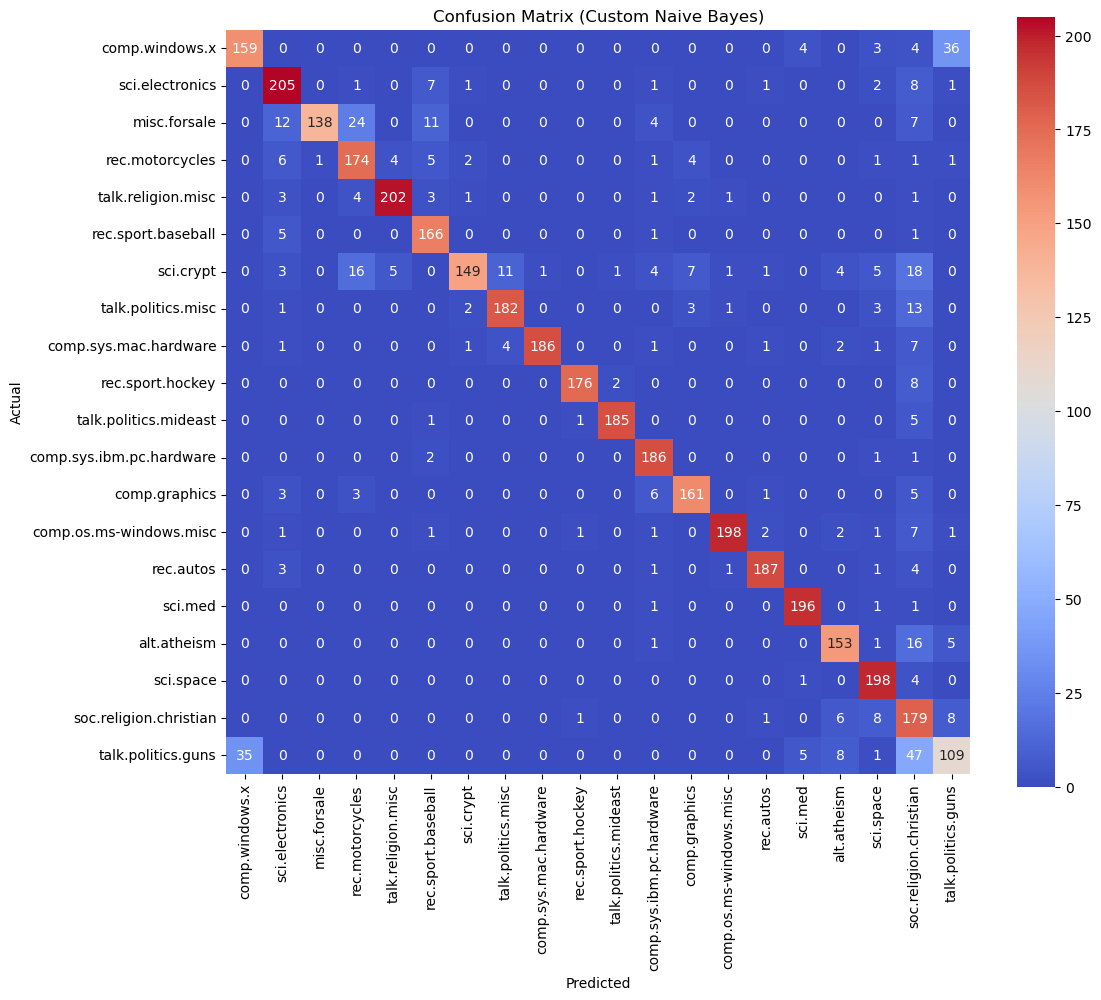

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
conf_matrix_custom = confusion_matrix(y_test, predictions)

# Create a DataFrame for better visualization
conf_df_custom = pd.DataFrame(conf_matrix_custom, index=df['label'].unique(), columns=df['label'].unique())

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(conf_df_custom, annot=True, fmt='d', cmap='coolwarm', cbar=True, square=True)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Custom Naive Bayes)')

plt.show()


# Results From Model(Basic from scratch)

1.This model performs well on sci.electronics,talk.religion.misc categories

2.Like previousl model is also performing poorly on talk.politics.guns 

3.overall the results are pretty similar from both models